In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
df = pd.read_excel('/Users/justiieee/Desktop/KPMG project/KPMG_data_cleaned.xlsx',sheet_name='Customer Demographic')
df.dtypes

customer_id                                     int64
gender                                         object
past_3_years_bike_related_purchases             int64
age                                             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
owns_car                                       object
property_valuation                              int64
tenure                                          int64
state                                          object
Customer_Group                                 object
dtype: object

In [7]:
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,property_valuation,tenure,state,Customer_Group
0,1,Female,93,67,1953-10-12,Financial Advisor,Health,Mass Customer,Yes,10,11,NSW,Very High
1,2,Male,81,39,1980-12-16,GIS Technical Architect,Financial Services,Mass Customer,Yes,10,16,NSW,Low
2,12,Male,58,26,1994-07-21,Structural Engineer,Manufacturing,Mass Customer,No,4,8,QLD,Medium
3,13,Male,38,65,1955-02-15,Professor,Financial Services,High Net Worth,Yes,6,8,VIC,High
4,14,Female,85,37,1983-03-25,Assistant Media Planner,Financial Services,Affluent Customer,No,8,6,NSW,Medium


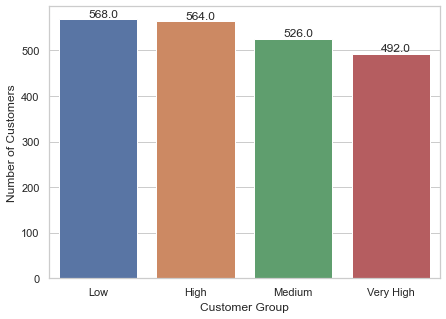

In [8]:
fig, axes = plt.subplots(1,1, figsize=(7, 5))
sns.countplot(data=df, x='Customer_Group',order=df['Customer_Group'].value_counts().index)
axes.set_xlabel('Customer Group')
axes.set_ylabel('Number of Customers')
for p in axes.patches:
        axes.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))
fig.savefig("Number of Customers by group.png")

In [9]:
df['job_title']=np.where(df['job_title'] =='Staff Accountant I', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Accountant II', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Senior Cost Accountant', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Cost Accountant', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Accountant III', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Accountant I', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Tax Accountant', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Accountant IV', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Staff Accountant III', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Staff Accountant II', 'Accountant', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Staff Accountant IV', 'Accountant', df['job_title'])

In [10]:
df['job_title']=np.where(df['job_title'] =='Computer Systems Analyst I', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Financial Analyst', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Budget/Accounting Analyst IV', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Budget/Accounting Analyst III', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Business Systems Development Analyst', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Programmer Analyst III', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Senior Financial Analyst', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Budget/Accounting Analyst II', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Compensation Analyst', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Computer Systems Analyst IV', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Computer Systems Analyst II', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Budget/Accounting Analyst I', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Programmer Analyst II', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Computer Systems Analyst III', 'Analyst', df['job_title'])
df['job_title']=np.where(df['job_title'] =='Programmer Analyst IV', 'Analyst', df['job_title'])


In [11]:
df['job_title']=np.where(df['job_title'].str.contains('Manager'), 'Manager', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Developer'), 'Developer', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Designer'), 'Designer', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Engineer'), 'Engineer', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Administrator'), 'Administrator', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Specialist'), 'Specialist', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Assistant'), 'Assistant', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Programmer'), 'Programmer', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Associate'), 'Associate', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Representative'), 'Representative', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Biostatistician'), 'Biostatistician', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Consultant'), 'Consultant', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Geologist'), 'Geologist', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Coach'), 'Coach', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Statistician'), 'Statistician', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Nurse'), 'Nurse', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Editor'), 'Editor', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('manager'), 'Manager', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Technician'), 'Technician', df['job_title'])
df['job_title']=np.where(df['job_title'].str.contains('Coordinator'), 'Coordinator', df['job_title'])

In [12]:
df['job_title'].unique()

array(['Financial Advisor', 'GIS Technical Architect', 'Engineer',
       'Professor', 'Assistant', 'Developer', 'Technical Writer',
       'Actuary', 'Manager', 'Nurse', 'Social Worker', 'Internal Auditor',
       'Food Chemist', 'Pharmacist', 'Technician', 'Accountant',
       'Coordinator', 'Librarian', 'Analyst', 'Dental Hygienist',
       'Geologist', 'Director of Sales', 'Representative',
       'Account Executive', 'Associate', 'Specialist', 'Staff Scientist',
       'Designer', 'Administrative Officer', 'Editor', 'Junior Executive',
       'VP Accounting', 'Help Desk Operator', 'Occupational Therapist',
       'Programmer', 'Operator', 'Administrator', 'VP Product Management',
       'Speech Pathologist', 'Paralegal', 'Biostatistician', 'Consultant',
       'Teacher', 'VP Sales', 'Statistician', 'Environmental Tech',
       'VP Quality Control', 'Coach', 'Executive Secretary',
       'VP Marketing', 'Data Coordiator', 'Recruiter'], dtype=object)

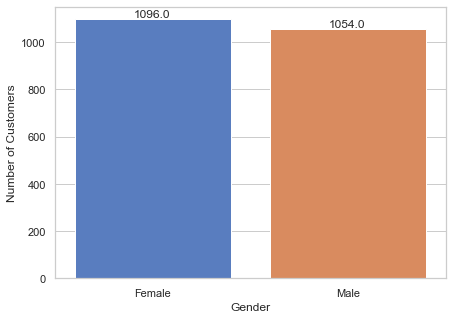

In [13]:
fig, axes = plt.subplots(1,1, figsize=(7, 5))
sns.countplot(x='gender',data=df, palette = 'muted')
axes.set_xlabel('Gender')
axes.set_ylabel('Number of Customers')
for p in axes.patches:
        axes.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
fig.savefig("Number of Customers by Gender.png")

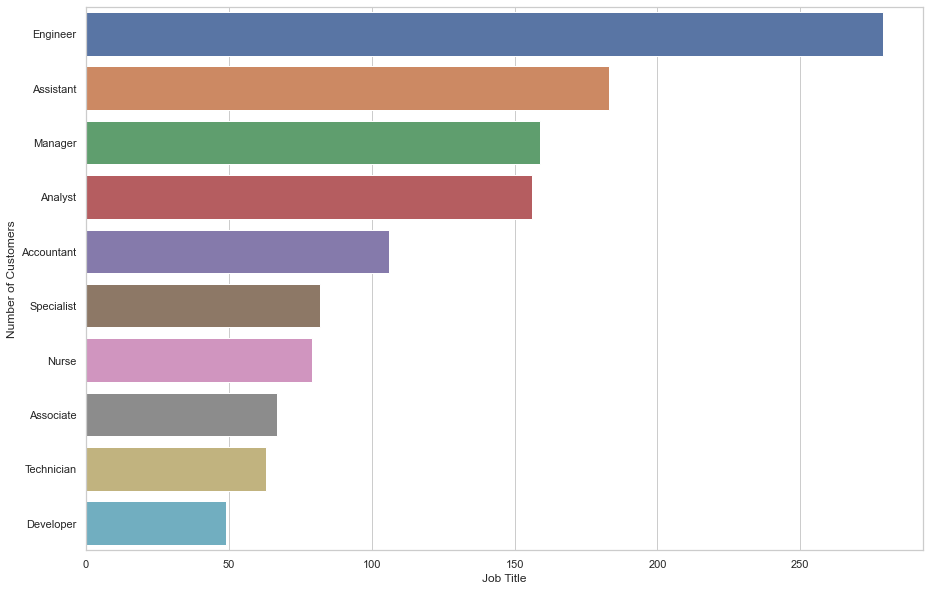

In [14]:
fig, axes = plt.subplots(1,1, figsize=(15, 10))
sns.countplot(data=df, y='job_title',order=df['job_title'].value_counts().iloc[:10].index)
axes.set_xlabel('Job Title')
axes.set_ylabel('Number of Customers')

fig.savefig("Number of Customers by Job Title.png")

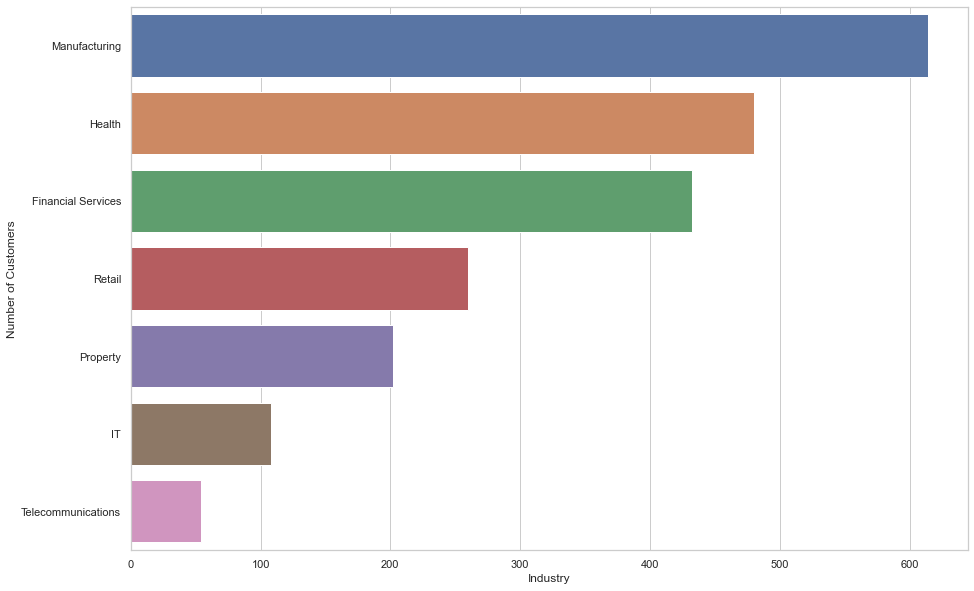

In [15]:
fig, axes = plt.subplots(1,1, figsize=(15, 10))
sns.countplot(data=df, y='job_industry_category',order=df['job_industry_category'].value_counts().index)
axes.set_xlabel('Industry')
axes.set_ylabel('Number of Customers')

fig.savefig("Number of Customers by Industry.png")

In [16]:
#Only consider customer with "very high" and "high" as target customers
#1: target; 0:not target
df['Customer_Group']=np.where(df['Customer_Group']=='Very High', 1, df['Customer_Group'])


In [17]:
df['Customer_Group']=np.where(df['Customer_Group']=='High', 0, df['Customer_Group'])
df['Customer_Group']=np.where(df['Customer_Group'] =='Low', 0, df['Customer_Group'])
df['Customer_Group']=np.where(df['Customer_Group']=='Medium', 0, df['Customer_Group'])

In [18]:
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,property_valuation,tenure,state,Customer_Group
0,1,Female,93,67,1953-10-12,Financial Advisor,Health,Mass Customer,Yes,10,11,NSW,1
1,2,Male,81,39,1980-12-16,GIS Technical Architect,Financial Services,Mass Customer,Yes,10,16,NSW,0
2,12,Male,58,26,1994-07-21,Engineer,Manufacturing,Mass Customer,No,4,8,QLD,0
3,13,Male,38,65,1955-02-15,Professor,Financial Services,High Net Worth,Yes,6,8,VIC,0
4,14,Female,85,37,1983-03-25,Assistant,Financial Services,Affluent Customer,No,8,6,NSW,0


In [19]:
df['Customer_Group'].unique()

array([1, 0], dtype=object)

In [20]:
df['Customer_Group'].value_counts()

0    1658
1     492
Name: Customer_Group, dtype: int64

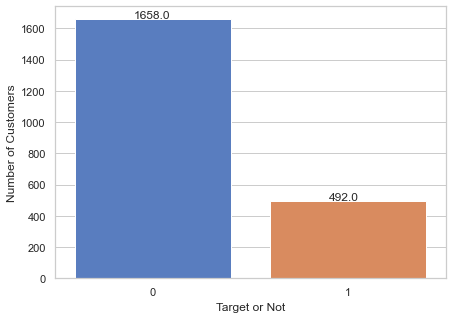

In [21]:
fig, axes = plt.subplots(1,1, figsize=(7, 5))
sns.countplot(x='Customer_Group',data=df, palette = 'muted')
axes.set_xlabel('Target or Not')
axes.set_ylabel('Number of Customers')
for p in axes.patches:
        axes.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
fig.savefig("Number of Customers by Target Group.png")

In [22]:
count_no_sub = len(df[df['Customer_Group']==0])
count_sub = len(df[df['Customer_Group']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 77.11627906976744
percentage of subscription 22.88372093023256


In [23]:
df.groupby('Customer_Group').mean()

,customer_id,past_3_years_bike_related_purchases,age,property_valuation,tenure
Customer_Group,,,,,
0,1745.196622,49.705669,42.767189,7.500603,10.684560
1,1691.471545,50.081301,42.495935,7.390244,10.802846


In [24]:
df.groupby('job_industry_category').mean()

,customer_id,past_3_years_bike_related_purchases,age,property_valuation,tenure
job_industry_category,,,,,
Financial Services,1690.002315,50.745370,41.629630,7.509259,10.321759
Health,1700.529167,50.368750,43.312500,7.675000,10.700000
IT,1693.277778,51.250000,42.629630,7.314815,11.722222
Manufacturing,1776.866450,49.356678,43.074919,7.426710,10.584691
Property,1737.193069,48.945545,42.623762,7.460396,11.376238
Retail,1770.626923,50.169231,42.615385,7.261538,10.526923
Telecommunications,1745.537037,40.407407,42.592593,7.388889,11.759259


In [25]:
df.groupby('job_title').mean()

,customer_id,past_3_years_bike_related_purchases,age,property_valuation,tenure
job_title,,,,,
Account Executive,1608.875000,53.125000,47.875000,7.625000,10.875000
Accountant,1803.622642,51.254717,41.433962,7.584906,11.254717
Actuary,1680.565217,48.043478,42.043478,7.521739,9.739130
Administrative Officer,1710.592593,53.888889,47.481481,8.000000,10.370370
Administrator,1611.555556,47.916667,42.694444,8.000000,12.583333
Analyst,1759.974359,51.500000,43.057692,7.461538,10.839744
Assistant,1696.087432,50.939891,42.469945,7.366120,9.972678
Associate,1823.671642,44.776119,43.522388,7.208955,11.955224
Biostatistician,1463.863636,45.818182,43.227273,8.136364,13.000000


In [26]:
df.groupby('gender').mean()

,customer_id,past_3_years_bike_related_purchases,age,property_valuation,tenure
gender,,,,,
Female,1750.856752,48.730839,42.671533,7.478102,10.596715
Male,1714.232448,50.894687,42.740038,7.472486,10.831120


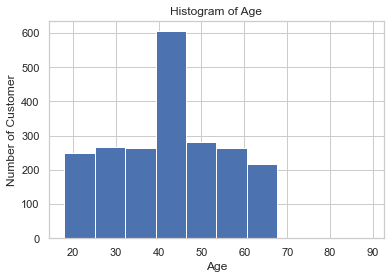

In [27]:
# Most of the customers in this dataset are in the age range of 40-45.
# seems like a good predictor for outcome
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.savefig('Histogram of Age')

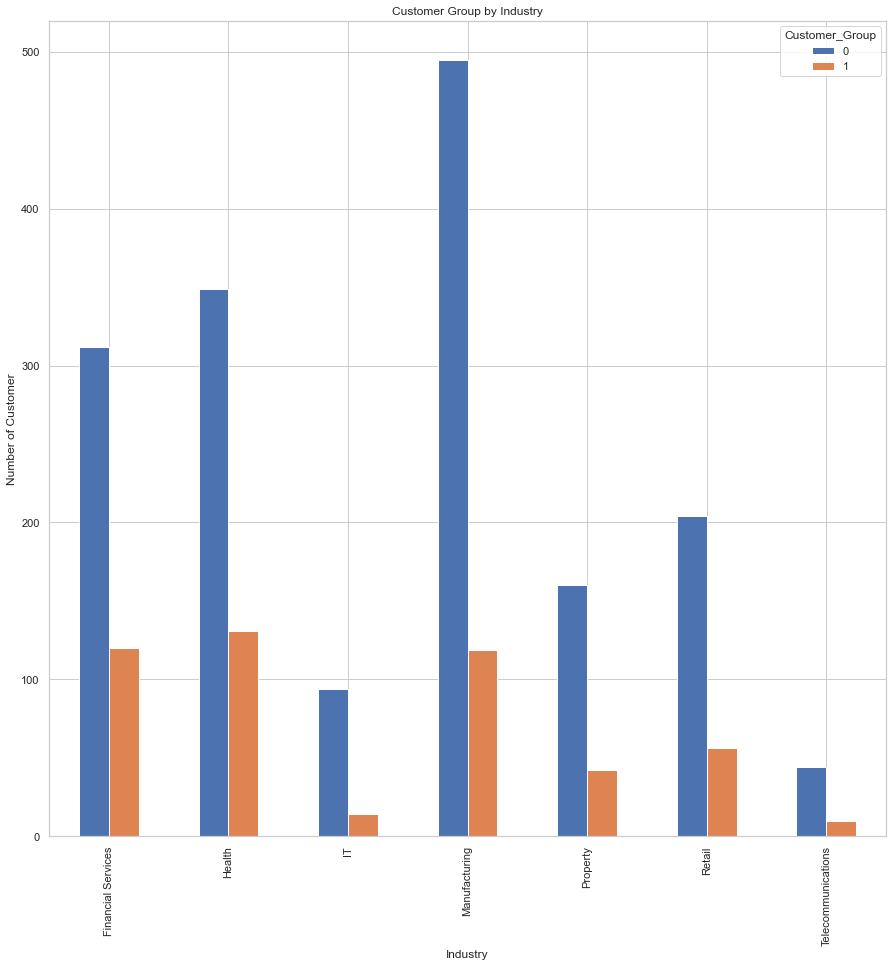

In [28]:
#plot: if target customer or not by industry
# 1: target; 0 not target
# seems like a good predictor for outcome
%matplotlib inline
pd.crosstab(df.job_industry_category,df.Customer_Group).plot(kind='bar',figsize=(15,15))
plt.title('Customer Group by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Customer')
plt.savefig('Customer Group by Industry')

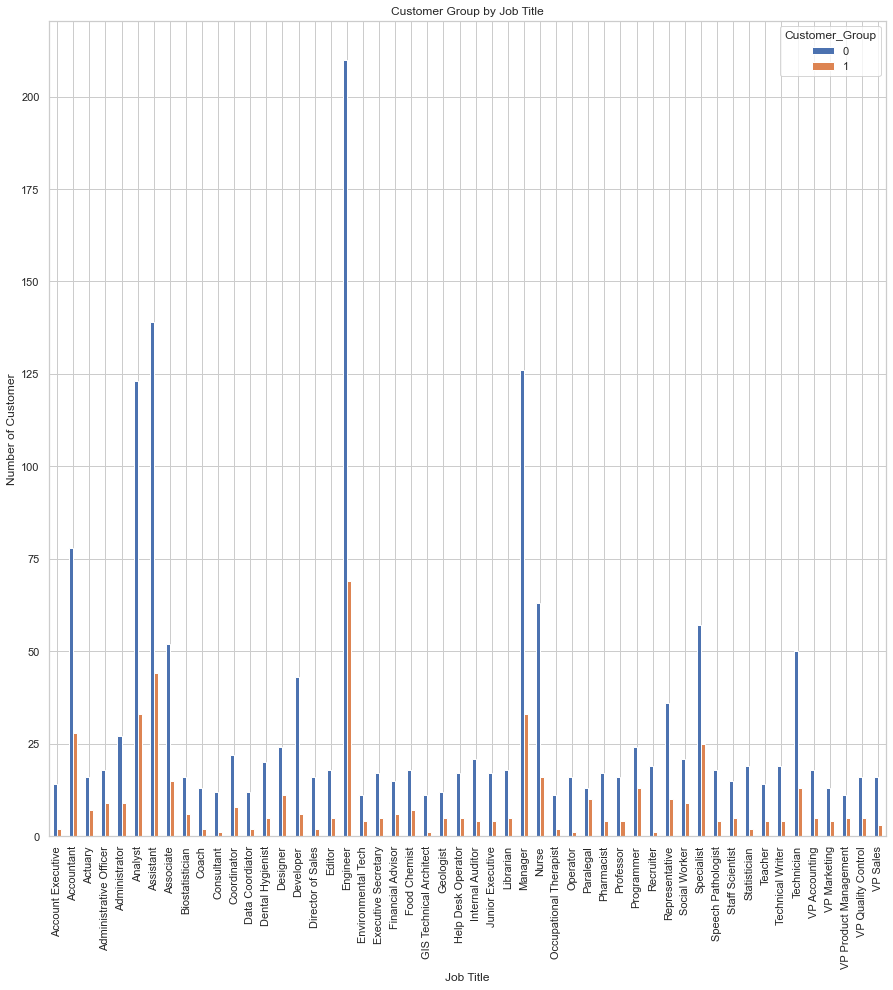

In [29]:
# Job title seems like a good predictor for outcome
%matplotlib inline
pd.crosstab(df.job_title,df.Customer_Group).plot(kind='bar',figsize=(15,15))
plt.title('Customer Group by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Customer')

plt.savefig('Customer Group by Job Title')

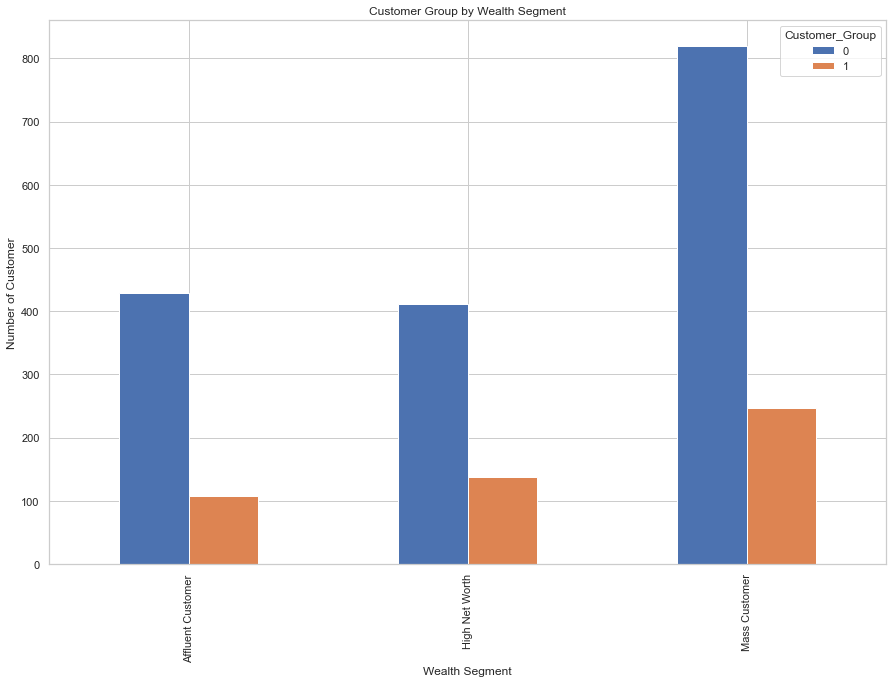

In [30]:
%matplotlib inline
pd.crosstab(df.wealth_segment,df.Customer_Group).plot(kind='bar',figsize=(15,10))
plt.title('Customer Group by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customer')
plt.savefig('Customer Group by Wealth Segment')

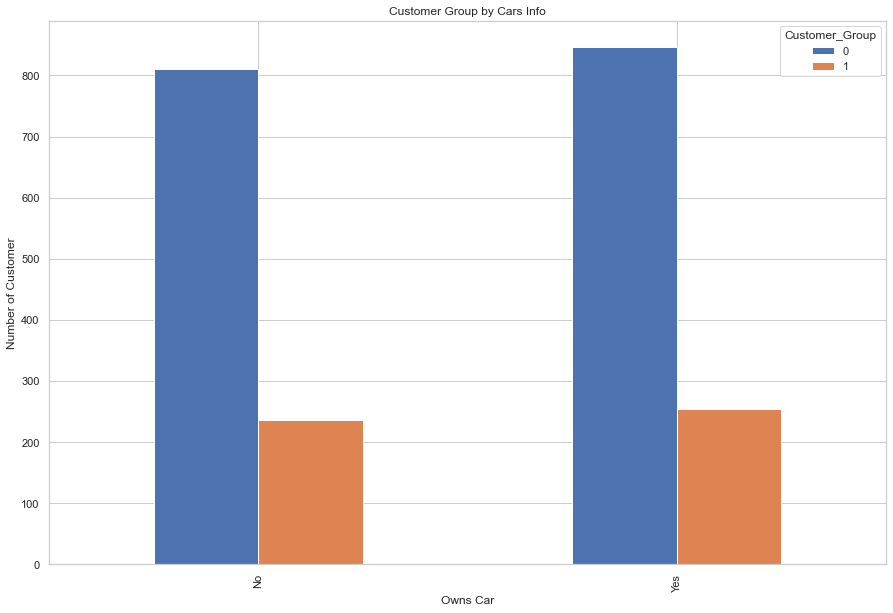

In [31]:
%matplotlib inline
pd.crosstab(df.owns_car,df.Customer_Group).plot(kind='bar',figsize=(15,10))
plt.title('Customer Group by Cars Info')
plt.xlabel('Owns Car')
plt.ylabel('Number of Customer')
plt.savefig('Customer Group by Cars Info')

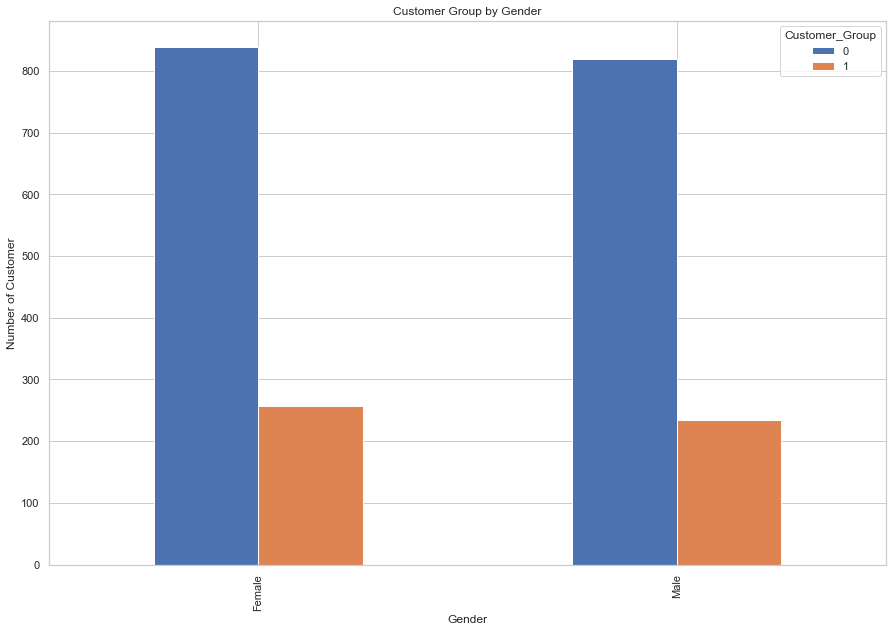

In [32]:
# pretty evenly distributed
%matplotlib inline
pd.crosstab(df.gender,df.Customer_Group).plot(kind='bar',figsize=(15,10))
plt.title('Customer Group by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customer')
plt.savefig('Customer Group by Gender')

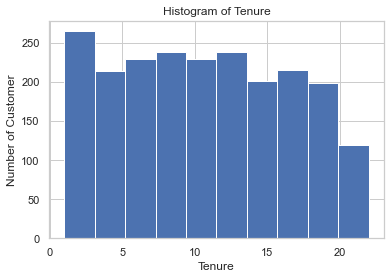

In [33]:
# seems like a good predictor for outcome
df.tenure.hist()
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.savefig('Histogram of Tenure')

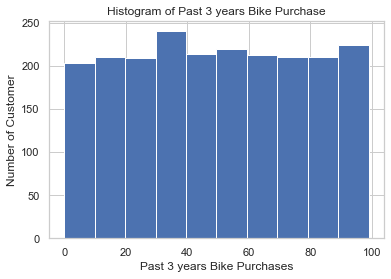

In [34]:
df.past_3_years_bike_related_purchases.hist()
plt.title('Histogram of Past 3 years Bike Purchase')
plt.xlabel('Past 3 years Bike Purchases')
plt.ylabel('Number of Customer')
plt.savefig('Histogram of Past 3 years Bike Purchase')

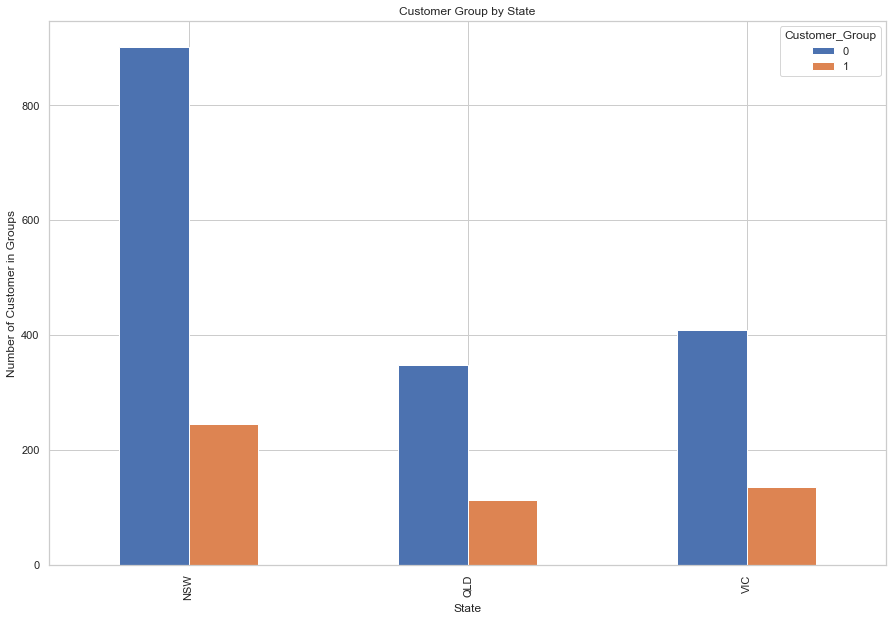

In [35]:
# Most customers are from NSW 
# seems like a good predictor for the outcome
%matplotlib inline
pd.crosstab(df.state,df.Customer_Group).plot(kind='bar',figsize=(15,10))
plt.title('Customer Group by State')
plt.xlabel('State')
plt.ylabel('Number of Customer in Groups')
plt.savefig('Customer Group by State')

In [36]:
# create dummy variables
cat_vars=['gender', 'job_title','job_industry_category','wealth_segment','owns_car','state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['gender','job_title','job_industry_category','wealth_segment','owns_car','state']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [37]:
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,age,DOB,job_title,job_industry_category,wealth_segment,owns_car,property_valuation,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,1,Female,93,67,1953-10-12,Financial Advisor,Health,Mass Customer,Yes,10,...,0,0,0,0,1,0,1,1,0,0
1,2,Male,81,39,1980-12-16,GIS Technical Architect,Financial Services,Mass Customer,Yes,10,...,0,0,0,0,1,0,1,1,0,0
2,12,Male,58,26,1994-07-21,Engineer,Manufacturing,Mass Customer,No,4,...,0,0,0,0,1,1,0,0,1,0
3,13,Male,38,65,1955-02-15,Professor,Financial Services,High Net Worth,Yes,6,...,0,0,0,1,0,0,1,0,0,1
4,14,Female,85,37,1983-03-25,Assistant,Financial Services,Affluent Customer,No,8,...,0,0,1,0,0,1,0,1,0,0


In [38]:
df_final=df[to_keep]
df_final.columns.values

array(['customer_id', 'past_3_years_bike_related_purchases', 'age', 'DOB',
       'property_valuation', 'tenure', 'Customer_Group', 'gender_Female',
       'gender_Male', 'job_title_Account Executive',
       'job_title_Accountant', 'job_title_Actuary',
       'job_title_Administrative Officer', 'job_title_Administrator',
       'job_title_Analyst', 'job_title_Assistant', 'job_title_Associate',
       'job_title_Biostatistician', 'job_title_Coach',
       'job_title_Consultant', 'job_title_Coordinator',
       'job_title_Data Coordiator', 'job_title_Dental Hygienist',
       'job_title_Designer', 'job_title_Developer',
       'job_title_Director of Sales', 'job_title_Editor',
       'job_title_Engineer', 'job_title_Environmental Tech',
       'job_title_Executive Secretary', 'job_title_Financial Advisor',
       'job_title_Food Chemist', 'job_title_GIS Technical Architect',
       'job_title_Geologist', 'job_title_Help Desk Operator',
       'job_title_Internal Auditor', 'job_title_Jun

In [39]:
# data pretty balanced, no need to oversample the data

# Specify X and y
X = df_final.loc[:, df_final.columns != 'Customer_Group']
X = X.drop(['customer_id','DOB','job_title_Librarian'], axis=1)
y = df_final.loc[:, df_final.columns == 'Customer_Group']
from imblearn.over_sampling import SMOTE


In [40]:
X.head()

,past_3_years_bike_related_purchases,age,property_valuation,tenure,gender_Female,gender_Male,job_title_Account Executive,job_title_Accountant,job_title_Actuary,job_title_Administrative Officer,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,93,67,10,11,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,81,39,10,16,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,58,26,4,8,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,38,65,6,8,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,85,37,8,6,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [41]:
# Split training and test data
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
y_train=y_train.astype('int')
os_X,os_y=os.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['Customer_Group'])


print("length of oversampled data is ",len(os_X))
print("Number of High customer in oversampled data",len(os_y[os_y['Customer_Group']==0]))
print("Number of High customer",len(os_y[os_y['Customer_Group']==1]))
print("Proportion of no High customer in oversampled data is ",len(os_y[os_y['Customer_Group']==0])/len(os_X))
print("Proportion of High customer in oversampled data is ",len(os_y[os_y['Customer_Group']==1])/len(os_X))

length of oversampled data is  2634
Number of High customer in oversampled data 1317
Number of High customer 1317
Proportion of no High customer in oversampled data is  0.5
Proportion of High customer in oversampled data is  0.5


In [42]:
# Recursive Feature Elimination
df_final_vars=df_final.columns.values.tolist()
y=['Customer_Group']
X=[i for i in X if i not in y]

model = LogisticRegression(max_iter=1000)
#rfe = RFE(logreg, n_features_to_select=10)
selector = RFE(model, n_features_to_select=20, step=1)
selector = selector.fit(os_X, os_y.values.ravel())
print(selector.support_)
print(selector.ranking_)
#The selector selected 'past_3_years_bike_related_purchases', 'age','property_valuation', 'tenure', 'gender_Female', 'gender_Male','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT','job_industry_category_Manufacturing', 'job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications', 'wealth_segment_Affluent Customer','wealth_segment_High Net Worth', 'wealth_segment_Mass Customer','owns_car_No', 'owns_car_Yes','state_QLD','state_VIC'

[False False False False  True  True False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False  True False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[53 52 50 51  1  1 10 30 42 46 34 23 28 25 43 12  3 39 22 32 40  5  1 29
 33 38 17 31 26  7 45 27  8 41 20 16 13  1 49 15 14  6  1 24 47 44 19 37
  2  4  9 18 11 35 48 36 21  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [43]:
os_X.columns.values

array(['past_3_years_bike_related_purchases', 'age', 'property_valuation',
       'tenure', 'gender_Female', 'gender_Male',
       'job_title_Account Executive', 'job_title_Accountant',
       'job_title_Actuary', 'job_title_Administrative Officer',
       'job_title_Administrator', 'job_title_Analyst',
       'job_title_Assistant', 'job_title_Associate',
       'job_title_Biostatistician', 'job_title_Coach',
       'job_title_Consultant', 'job_title_Coordinator',
       'job_title_Data Coordiator', 'job_title_Dental Hygienist',
       'job_title_Designer', 'job_title_Developer',
       'job_title_Director of Sales', 'job_title_Editor',
       'job_title_Engineer', 'job_title_Environmental Tech',
       'job_title_Executive Secretary', 'job_title_Financial Advisor',
       'job_title_Food Chemist', 'job_title_GIS Technical Architect',
       'job_title_Geologist', 'job_title_Help Desk Operator',
       'job_title_Internal Auditor', 'job_title_Junior Executive',
       'job_title_Manage

In [44]:
# Feature Elimination result for include job_title and only very high as outcome 1
cols0=['gender_Female', 'gender_Male','job_title_Director of Sales','job_title_Operator','job_title_Recruiter','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT','job_industry_category_Manufacturing','job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications','wealth_segment_Affluent Customer','wealth_segment_High Net Worth', 'wealth_segment_Mass Customer','owns_car_No', 'owns_car_Yes', 'state_NSW', 'state_QLD','state_VIC']
X=os_X[cols0]
y=os_y

In [332]:
cols=['age','property_valuation', 'tenure', 'gender_Female', 'gender_Male','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT', 'job_industry_category_Manufacturing','job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications','wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer','owns_car_No', 'owns_car_Yes', 'state_NSW', 'state_QLD','state_VIC'] 
X=os_X[cols]
y=os_y

In [45]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.582835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Customer_Group   No. Observations:                 2634
Model:                          Logit   Df Residuals:                     2614
Method:                           MLE   Df Model:                           19
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.1591
Time:                        15:11:27   Log-Likelihood:                -1535.2
converged:                       True   LL-Null:                       -1825.7
Covariance Type:            nonrobust   LLR p-value:                4.830e-111
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
gender_Female                                1.2

In [46]:
# second results included job_title
cols00=['gender_Female', 'gender_Male','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT','job_industry_category_Manufacturing','job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications','wealth_segment_Affluent Customer','wealth_segment_High Net Worth', 'wealth_segment_Mass Customer','owns_car_No', 'owns_car_Yes', 'state_QLD','state_VIC']

In [334]:
cols2=['age','property_valuation', 'tenure','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT', 'job_industry_category_Manufacturing','job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications','wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer', 'state_NSW','state_VIC'] 


Optimization terminated successfully.
         Current function value: 0.474595
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Customer_Group   No. Observations:                 2634
Model:                          Logit   Df Residuals:                     2619
Method:                           MLE   Df Model:                           14
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.3153
Time:                        01:42:00   Log-Likelihood:                -1250.1
converged:                       True   LL-Null:                       -1825.7
Covariance Type:            nonrobust   LLR p-value:                5.004e-237
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
age                                          0.0

In [47]:
X=os_X[cols00]
y=os_y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.586727
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Customer_Group   No. Observations:                 2634
Model:                          Logit   Df Residuals:                     2618
Method:                           MLE   Df Model:                           15
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.1535
Time:                        15:11:35   Log-Likelihood:                -1545.4
converged:                       True   LL-Null:                       -1825.7
Covariance Type:            nonrobust   LLR p-value:                8.127e-110
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
gender_Female                                1.3

In [48]:
#final result
cols000=['gender_Female', 'gender_Male','job_industry_category_Financial Services','job_industry_category_Health', 'job_industry_category_IT','job_industry_category_Manufacturing','job_industry_category_Property', 'job_industry_category_Retail','job_industry_category_Telecommunications','wealth_segment_Affluent Customer','owns_car_No', 'owns_car_Yes']

In [49]:
X=os_X[cols000]
y=os_y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.587907
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Customer_Group   No. Observations:                 2634
Model:                          Logit   Df Residuals:                     2622
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.1518
Time:                        15:11:41   Log-Likelihood:                -1548.5
converged:                       True   LL-Null:                       -1825.7
Covariance Type:            nonrobust   LLR p-value:                7.828e-112
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
gender_Female                                1.2

In [50]:
from sklearn import metrics
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [51]:
y_test=y_test.astype('int')
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [514]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       341
           1       0.00      0.00      0.00        89

    accuracy                           0.79       430
   macro avg       0.40      0.50      0.44       430
weighted avg       0.63      0.79      0.70       430



/Users/justiieee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predict on the new customer set
dfnew = pd.read_excel('/Users/justiieee/Desktop/KPMG project/KPMG_data_cleaned.xlsx',sheet_name='New_C_Cleaned')
dfnew.dtypes

In [ ]:
dfnew['job_title']=np.where(dfnew['job_title'] =='Staff Accountant I', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Accountant II', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Senior Cost Accountant', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Cost Accountant', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Accountant III', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Accountant I', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Tax Accountant', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Accountant IV', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Staff Accountant III', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Staff Accountant II', 'Accountant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Staff Accountant IV', 'Accountant', dfnew['job_title'])

In [ ]:
dfnew['job_title']=np.where(dfnew['job_title'] =='Computer Systems Analyst I', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Financial Analyst', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Budget/Accounting Analyst IV', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Budget/Accounting Analyst III', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Business Systems Development Analyst', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Programmer Analyst III', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Senior Financial Analyst', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Budget/Accounting Analyst II', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Compensation Analyst', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Computer Systems Analyst IV', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Computer Systems Analyst II', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Budget/Accounting Analyst I', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Programmer Analyst II', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Computer Systems Analyst III', 'Analyst', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'] =='Programmer Analyst IV', 'Analyst', dfnew['job_title'])

In [ ]:
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Manager'), 'Manager', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Developer'), 'Developer', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Designer'), 'Designer', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Engineer'), 'Engineer', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Administrator'), 'Administrator', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Specialist'), 'Specialist', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Assistant'), 'Assistant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Programmer'), 'Programmer', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Associate'), 'Associate', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Representative'), 'Representative', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Biostatistician'), 'Biostatistician', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Consultant'), 'Consultant', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Geologist'), 'Geologist', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Coach'), 'Coach', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Statistician'), 'Statistician', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Nurse'), 'Nurse', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Editor'), 'Editor', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('manager'), 'Manager', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Technician'), 'Technician', dfnew['job_title'])
dfnew['job_title']=np.where(dfnew['job_title'].str.contains('Coordinator'), 'Coordinator', dfnew['job_title'])

In [ ]:
df['job_title'].unique()

In [ ]:
#creating dummy variables for New Customers
cat_vars=['gender','job_title','job_industry_category','wealth_segment','owns_car','state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dfnew[var], prefix=var)
    df2=dfnew.join(cat_list)
    dfnew=df2
    
cat_vars=['gender','job_title','job_industry_category','wealth_segment','owns_car','state']
dfnew_vars=dfnew.columns.values.tolist()
to_keep=[i for i in dfnew_vars if i not in cat_vars]

In [ ]:
dfnew_final=dfnew[to_keep]
dfnew_final.columns.values

In [ ]:
dfnew_final.head()

In [ ]:
# Specify Xnew and ynew
from sklearn import *
columns = dfnew_final.columns
Xnew = dfnew_final.loc[:, dfnew_final.columns != 'DOB']
Xnew = Xnew.drop(['first_name','last_name','year'], axis=1)

In [ ]:
Xnew.head()

In [ ]:
y_prednew = logreg.predict(Xnew)
